# Actividad 1: Creación de Diccionario

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 17 de Octubre de 2023

---

## Instrucciones

**Contador de palabras**

 - El objetivo es realizar un conteo de las palabras de un texto, el archivo de entrada puede ser de cualquier formato, pero debe de entregar un histograma del mismo.
 - Realizar una nube de palabras a partir del corpus obtenido de su base de datos de proyecto o el corpus de cualquier libro.

**Bonus (opcional)**

  - Creación de un diccionario de palabras. 
  - Realizar una corrección del texto con respecto al diccionario usando cálculo de distancia de “strings”.

## Solución

### Contador de palabras

Como primer paso, importamos las librerías necesarias para el desarrollo de la actividad y descargamos los recursos necesarios de NLTK.

El texto seleccionado como corpus es el libro [*"El aprendiz de conspirador"*](https://www.gutenberg.org/ebooks/47103) de Pío Baroja, dicho libro se encuentra en formato .txt con el nombre de "`Corpus.txt`".

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from Levenshtein import distance

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alfonsopineda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alfonsopineda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

A continuación, definimos una función que nos permita obtener el texto de un archivo de texto plano. Almacenamos el texto en una variable (`words`), lo convertimos a minúsculas para facilitar el conteo de palabras y lo tokenizamos para obtener una lista de palabras.

Posteriormente, "limpiamos" la lista de palabras, eliminando signos de puntuación y caracteres especiales, y sobreescribimos la variable `words` con la lista resultante.

In [46]:
with open('Corpus.txt', 'r', encoding='utf-8') as file:
    text = file.read()

words = nltk.word_tokenize(text.lower())

# Utilizamos una expresión regular para eliminar caracteres especiales y números
cleaned_text = re.sub(r'[^a-zA-ZñÑáéíóúÁÉÍÓÚüÜ\s]', '', text.lower())

words = nltk.word_tokenize(cleaned_text)

Asimismo, filtramos las palabras eliminando artículos y preposiciones haciendo uso de la librería NLTK y la lista de palabras vacías (`stopwords`) que esta proporciona.

In [47]:
filtered_words = [word for word in words if word not in stopwords.words('spanish') and word not in ["si", "no"]]

Haciendo uso nuevamente de la librería NLTK, obtenemos la frecuencia de cada palabra en el texto y la almacenamos en un arreglo (`freq_dist`). Posteriormente obtenemos las 20 palabras más frecuentes y realizamos un histograma de las mismas haciendo uso de la librería `matplotlib`.

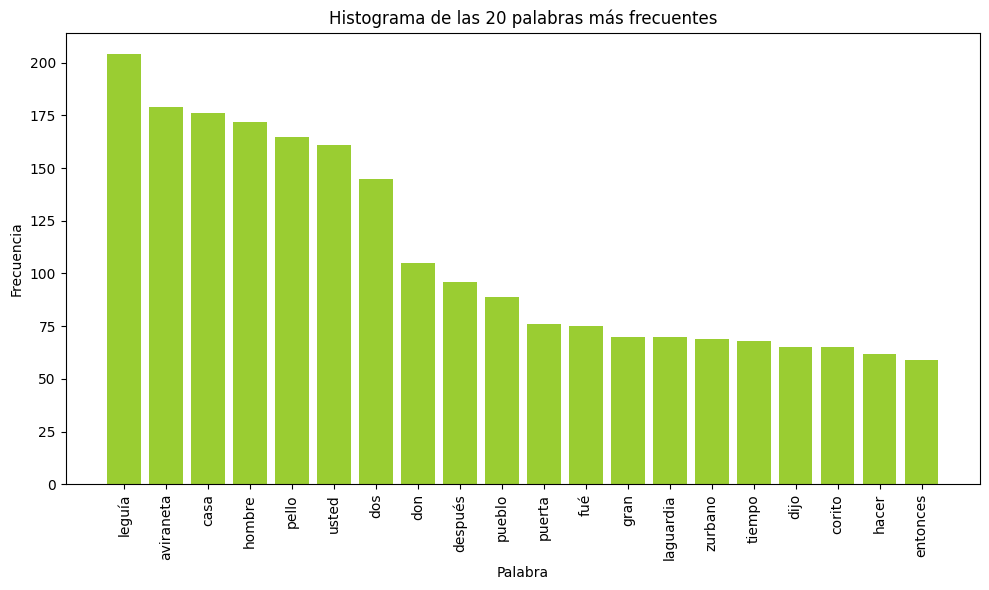

In [48]:
freq_dist = FreqDist(filtered_words)
most_common_words = freq_dist.most_common(20)

# Mostramos las 20 palabras más comunes en un histograma
plt.figure(figsize=(10, 6))
plt.bar(range(20), [item[1] for item in most_common_words], color='yellowgreen')
plt.xticks(range(20), [item[0] for item in most_common_words], rotation=90)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Histograma de las 20 palabras más frecuentes')
plt.tight_layout()


Como segundo método de visualización de la frecuencia de palabras, realizamos una nube de palabras haciendo uso de la librería `wordcloud`. En este caso, la nube de palabras se genera a partir de la lista de palabras filtradas (`filtered_words`), es decir, incluye todas las palabras obtenidas del texto, no solo las 20 más frecuentes.

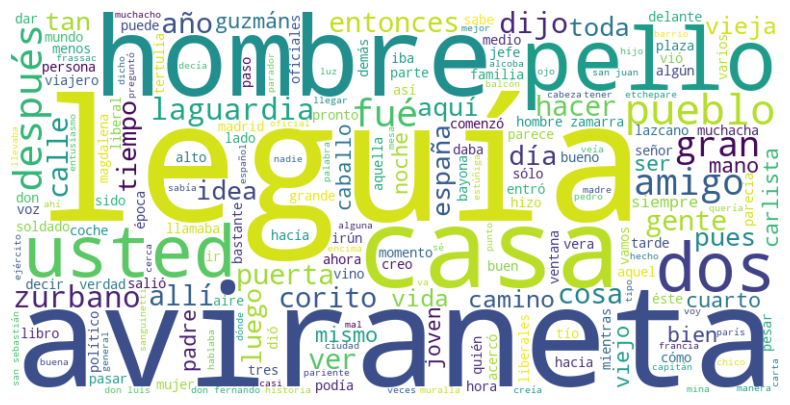

In [49]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Bonus

Para el bonus, creamos un diccionario de palabras a partir de nuestra lista de palabras filtradas (`filtered_words`) previamente obtenida. Al ser un diccionario, cada palabras cuenta con un índice asociado, el cual es su posición en la lista.

In [53]:
unique_words = list(set(filtered_words))
dictionary = {word: index for index, word in enumerate(unique_words)}


Por último, realizamos una corrección del texto con respecto al diccionario haciendo uso de la distancia de Levenshtein. Para ello, definimos una función que recibe como parámetro una palabra y regresa la palabra más cercana a esta en el diccionario (con una distancia de Levenshtein mínima), así como su distancia de Levenshtein con respecto a la palabra original.

Posteriormente, se le solicita al usuario que ingrese una palabra, si la distancia de Levenshtein de esta con respecto a la palabra más cercana en el diccionario es cero (la palabra se encuentra en el diccionario), se le notifica al usuario que la palabra es correcta. En caso contrario, se le notifica al usuario que la palabra es incorrecta y se le sugiere la palabra más cercana; asimismo se le muestra la distancia de Levenshtein entre la palabra ingresada y la palabra más cercana.

In [55]:
def find_closest_word(input_word):
    closest_word = None
    min_distance = float('inf')
    
    for word in unique_words:
        d = distance(input_word, word)
        if d < min_distance:
            min_distance = d
            closest_word = word
    
    return closest_word, min_distance

input_word = input("Ingrese una palabra: ").lower()
closest_word, min_distance = find_closest_word(input_word)

print(f"Palabra ingresada: {input_word}")

if min_distance == 0:
    print("Palabra bien escrita")
else:
    print(f"\nPalabra no reconocida, sugerencia de corrección: {closest_word}")
    print(f"Distancia de Levenshtein: {min_distance}")

Palabra ingresada: desision

Palabra no reconocida, sugerencia de corrección: decisión
Distancia de Levenshtein: 2
